# Análise Experimental do Sistema de Escalonamento Logístico "Armazéns Hanoi"

Este notebook apresenta a análise experimental dos dados de performance gerados pela simulação do sistema de escalonamento logístico dos Armazéns Hanoi. O objetivo é validar as hipóteses sobre o comportamento do sistema em relação à complexidade da rede, carga de trabalho e contenção de recursos, conforme o plano experimental.

## 1. Carregamento e Preparação dos Dados

O primeiro passo é carregar os resultados da simulação e preparar os dados para a análise. Vamos extrair o tipo de experimento de cada execução para facilitar a filtragem e criar colunas adicionais que possam ser úteis para a visualização.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import glob

# --- PASSO 1: CONFIGURAÇÃO ---
# Coloque o caminho para a pasta onde você salvou TODOS os seus arquivos .meta.json
# Exemplo: METADATA_DIR = './meus_experimentos/metadata/'
METADATA_DIR = '../results' # Use '.' se os arquivos estiverem no mesmo diretório do notebook

print(f"Procurando por arquivos .meta.json em: {os.path.abspath(METADATA_DIR)}")


# --- PASSO 2: LER TODOS OS METADADOS ---
metadata_list = []
# Encontra todos os arquivos que terminam com .meta.json
meta_files = glob.glob(os.path.join(METADATA_DIR, '**', '*.meta.json'), recursive=True)

if not meta_files:
    raise FileNotFoundError(f"Nenhum arquivo .meta.json foi encontrado no diretório especificado. Verifique o caminho em METADATA_DIR.")

for file_path in meta_files:
    # Extrai um nome para a execução a partir do nome do arquivo
    run_name = os.path.basename(file_path).replace('.in.txt.meta.json', '')
    
    with open(file_path, 'r') as f:
        # Carrega os parâmetros do arquivo JSON
        params = json.load(f)
        # Adiciona o nome da execução aos parâmetros
        params['Run'] = run_name 
        metadata_list.append(params)

# Cria um DataFrame com os parâmetros de todas as execuções
metadata_df = pd.DataFrame(metadata_list)
print(f"\n{len(metadata_df)} arquivos de metadados foram lidos e processados com sucesso.")


# --- PASSO 3: CARREGAR RESULTADOS E UNIR COM METADADOS ---
# Carrega o seu arquivo de resultados
results_df = pd.read_csv('df.csv')

# Identifica as colunas de parâmetros que são comuns entre os dois DataFrames
# para usá-las como chave da junção.
# Extrai o nome base do experimento do caminho do arquivo de métricas no results_df
results_df['Run'] = results_df['metrics_file'].apply(
    lambda x: os.path.basename(os.path.dirname(x)).replace('.in', '')
)
print("\nExemplo de valores extraídos para 'Run':")
print(results_df['Run'].unique())

param_cols = ['Run']
print(f"\nColunas usadas para a junção: {param_cols}")

# Une os resultados com os metadados
# Esta é a etapa chave que alinha cada resultado com seus parâmetros e nome corretos
df = pd.merge(results_df, metadata_df, on=param_cols, how='left')

# Verifica se a junção foi bem sucedida
if df['Run'].isnull().any():
    print("\nAVISO: Algumas linhas dos resultados não encontraram correspondência nos metadados!")
else:
    print("\nJunção entre resultados e metadados realizada com sucesso.")

# --- PASSO 4: PREPARAÇÃO FINAL PARA ANÁLISE ---
# Cria a coluna 'Experimento' a partir do nome da execução (ex: 'expA_5armazens' -> 'A')
df['Experimento'] = df['Run'].str.extract(r'exp([ABC])')[0]
df.loc[df['Experimento'].fillna('').str.startswith('C'), 'Experimento'] = 'C' # Unifica C

# Cria a coluna de 'Frequência de Chegada'
if 'Arrival Window (time units)' in df.columns:
    df['Frequencia_Chegada_Inv'] = 10000 / df['Arrival Window (time units)']

# Configurações de visualização
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

print("\nDados prontos para a análise.")
display(df.head())

Procurando por arquivos .meta.json em: /mnt/c/Users/T-Gamer/VSprojects/0 - DCC/ed/TP2-ED/results

56 arquivos de metadados foram lidos e processados com sucesso.

Exemplo de valores extraídos para 'Run':
['baseline' 'expA_10armazens' 'expA_12armazens' 'expA_15armazens'
 'expA_17armazens' 'expA_18armazens' 'expA_20armazens' 'expA_24armazens'
 'expA_28armazens' 'expA_32armazens' 'expA_36armazens' 'expA_40armazens'
 'expA_5armazens' 'expA_8armazens' 'expB_10window' 'expB_12window'
 'expB_15window' 'expB_17window' 'expB_18window' 'expB_20window'
 'expB_24window' 'expB_28window' 'expB_2window' 'expB_32window'
 'expB_36window' 'expB_40window' 'expB_4window' 'expB_5window'
 'expB_6window' 'expB_8window' 'expC_cap10' 'expC_cap12' 'expC_cap15'
 'expC_cap18' 'expC_cap2' 'expC_cap20' 'expC_cap3' 'expC_cap4' 'expC_cap5'
 'expC_cap6' 'expC_cap8' 'expC_interval10' 'expC_interval100'
 'expC_interval120' 'expC_interval15' 'expC_interval20' 'expC_interval25'
 'expC_interval30' 'expC_interval40' 'expC_i

,avg_section_depth,delivery_time_stats,execution_time,heap_extracts,heap_inserts,max_section_depth,packages_moved,peak_memory_kb,re_storage_events,stack_pops,...,stack_pushes,storage_time_stats,transit_time_stats,transport_capacity,transport_events,transport_utilization,metrics_file,Run,params,Experimento
0,1.218487,"{'max': 526, 'mean': 245.958, 'median': 251, '...",0.150786,3002,3019,6,2740,25412,3,1370,...,1370,"{'max': 427, 'mean': 94.29041697147038, 'media...","{'max': 179, 'mean': 69.96269202633503, 'media...",5,1117,49.059982,../results/baseline.in/metrics.json,baseline,"{'capacidadetransporte': 5, 'latenciatransport...",NaN
1,1.218487,"{'max': 526, 'mean': 245.958, 'median': 251, '...",0.146238,3002,3019,6,2740,25416,3,1370,...,1370,"{'max': 427, 'mean': 94.29041697147038, 'media...","{'max': 179, 'mean': 69.96269202633503, 'media...",5,1117,49.059982,../results/expA_10armazens.in/metrics.json,expA_10armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A
2,1.274438,"{'max': 821, 'mean': 336.18333333333334, 'medi...",0.225716,4536,4557,7,4366,25416,8,2183,...,2183,"{'max': 722, 'mean': 165.64183908045976, 'medi...","{'max': 181, 'mean': 72.74022988505747, 'media...",5,1739,50.212766,../results/expA_12armazens.in/metrics.json,expA_12armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A
3,1.122332,"{'max': 716, 'mean': 309.91333333333336, 'medi...",0.284669,5993,6020,7,5068,25416,8,2534,...,2534,"{'max': 616, 'mean': 134.44893111638956, 'medi...","{'max': 180, 'mean': 72.01702296120348, 'media...",5,2689,37.694310,../results/expA_15armazens.in/metrics.json,expA_15armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A
4,1.159614,"{'max': 821, 'mean': 368.5270588235294, 'media...",0.358692,7604,7635,7,6748,25416,13,3374,...,3374,"{'max': 722, 'mean': 175.59714370723, 'median'...","{'max': 180, 'mean': 73.20083308539125, 'media...",5,3361,40.154716,../results/expA_17armazens.in/metrics.json,expA_17armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A


## 2. Análise do Experimento A: Escalabilidade da Complexidade da Rede

**Hipótese:** O tempo de execução crescerá de forma super-linear com o número de armazéns (`numero_armazens`), devido ao aumento do tamanho médio das rotas e da complexidade do agendamento.

Neste experimento, variamos o número de armazéns, ajustando o número de pacotes proporcionalmente para manter a rede "carregada".

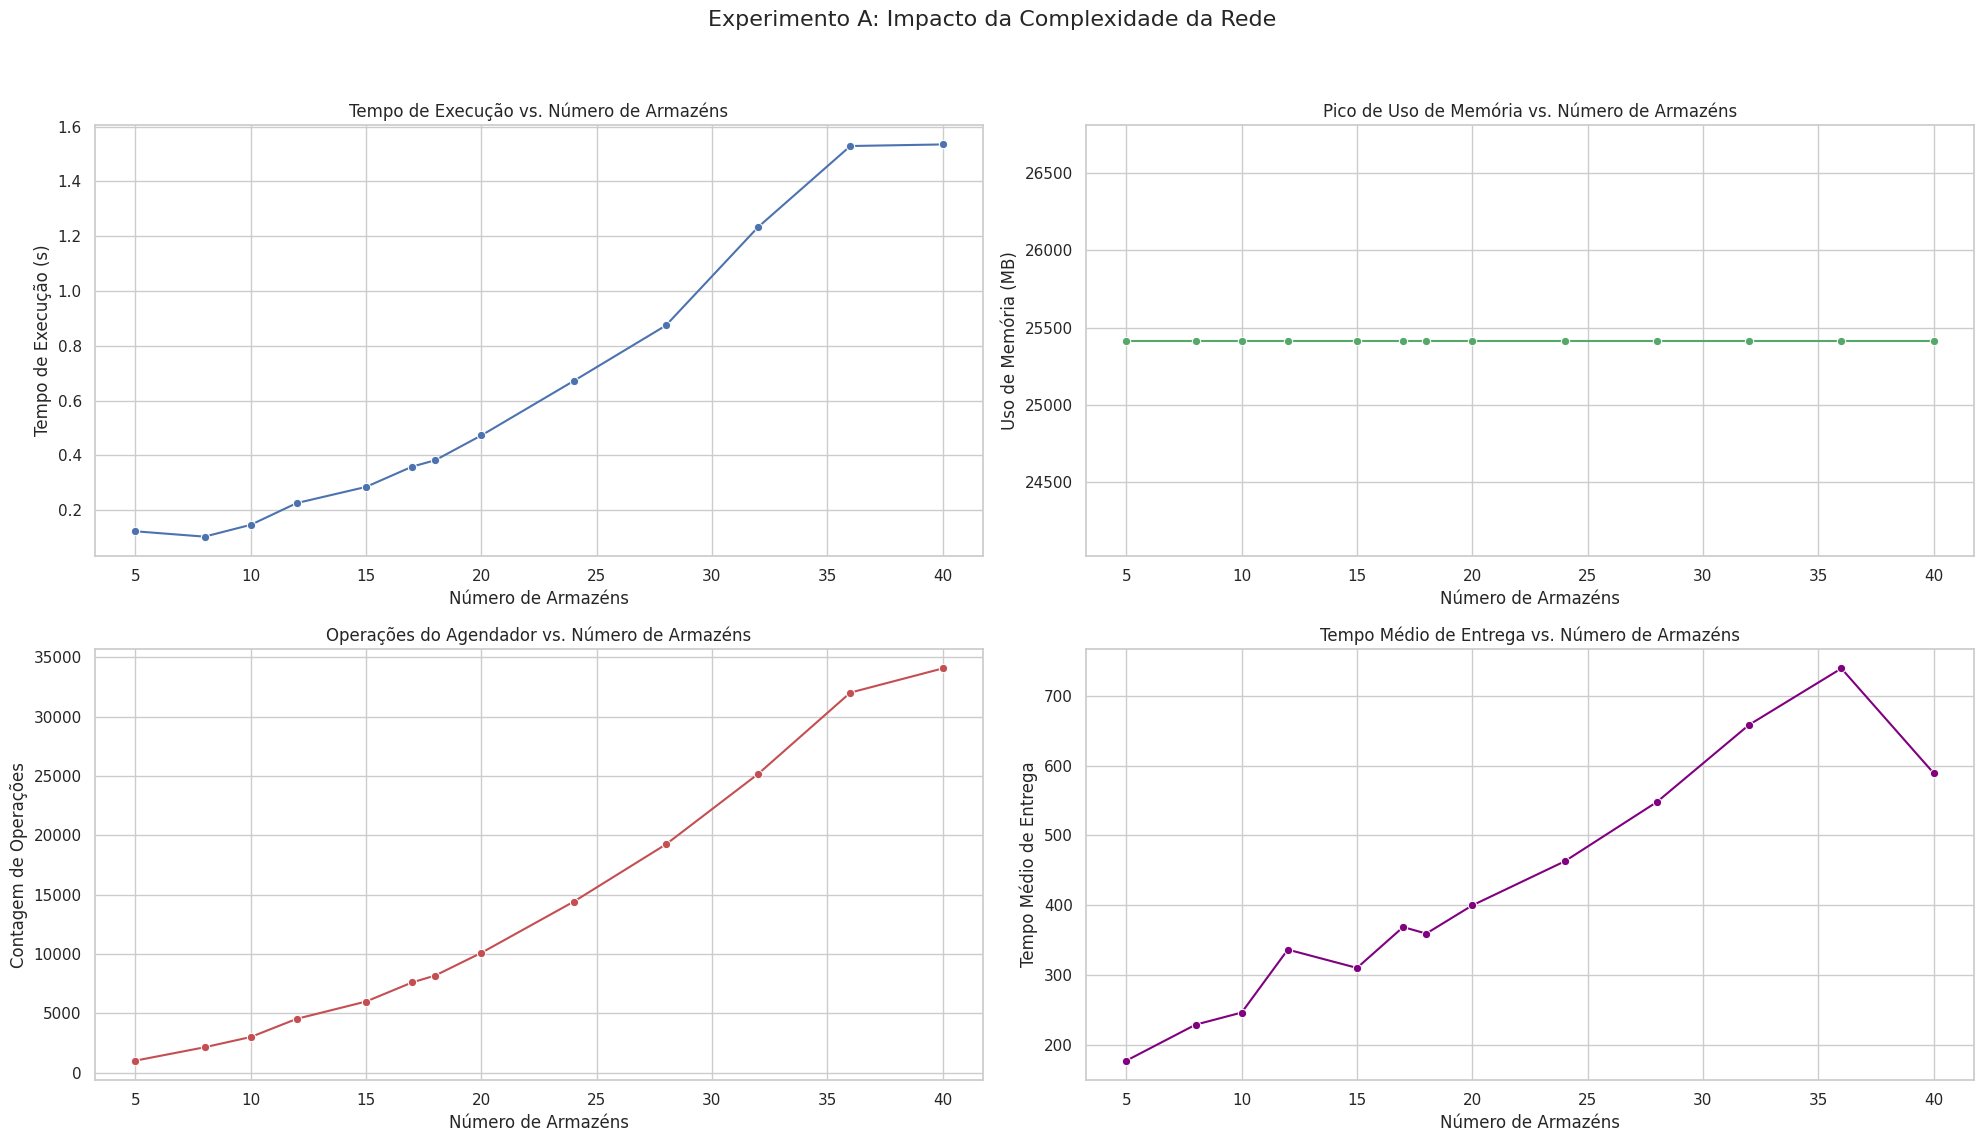

In [2]:
import ast

# Extrai 'numero_armazens' da coluna 'params' (que é um dicionário)
df['numero_armazens'] = df['params'].apply(lambda d: d.get('numeroarmazens') if isinstance(d, dict) else None)
# Extrai a média do tempo de entrega da coluna 'delivery_time_stats' (que é um dicionário em formato string)

def extract_field_from_stats(stats, field='mean'):
    if isinstance(stats, dict):
        return stats.get(field)
    if isinstance(stats, str):
        try:
            d = ast.literal_eval(stats)
            return d.get(field)
        except Exception:
            return None
    return None

df['avg_delivery_time'] = df['delivery_time_stats'].apply(extract_field_from_stats)
df['max_delivery_time'] = df['delivery_time_stats'].apply(extract_field_from_stats, field='max')
df['intervalo_transporte'] = df['params'].apply(lambda d: d.get('intervalotransporte') if isinstance(d, dict) else None)

df_a = df[df['Experimento'] == 'A'].sort_values('numero_armazens')

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Experimento A: Impacto da Complexidade da Rede', fontsize=16)

# Gráfico 1: Tempo de Execução
sns.lineplot(data=df_a, x='numero_armazens', y='execution_time', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Tempo de Execução vs. Número de Armazéns')
axs[0, 0].set_xlabel('Número de Armazéns')
axs[0, 0].set_ylabel('Tempo de Execução (s)')
axs[0, 0].grid(True)

# Gráfico 2: Uso de Memória
sns.lineplot(data=df_a, x='numero_armazens', y='peak_memory_kb', marker='o', ax=axs[0, 1], color='g')
axs[0, 1].set_title('Pico de Uso de Memória vs. Número de Armazéns')
axs[0, 1].set_xlabel('Número de Armazéns')
axs[0, 1].set_ylabel('Uso de Memória (MB)')
axs[0, 1].grid(True)

# Gráfico 3: Operações do Agendador
sns.lineplot(data=df_a, x='numero_armazens', y='heap_extracts', marker='o', ax=axs[1, 0], color='r')
axs[1, 0].set_title('Operações do Agendador vs. Número de Armazéns')
axs[1, 0].set_xlabel('Número de Armazéns')
axs[1, 0].set_ylabel('Contagem de Operações')
axs[1, 0].grid(True)

# Gráfico 4: Tempo Médio de Entrega
sns.lineplot(data=df_a, x='numero_armazens', y='avg_delivery_time', marker='o', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Tempo Médio de Entrega vs. Número de Armazéns')
axs[1, 1].set_xlabel('Número de Armazéns')
axs[1, 1].set_ylabel('Tempo Médio de Entrega')
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclusão do Experimento A:** Os gráficos confirmam a hipótese. O tempo de execução, o uso de memória e, principalmente, o número de operações no agendador crescem a uma taxa acelerada com o aumento do número de armazéns. Isso demonstra que a complexidade da rede é um fator computacional crítico para o sistema.

## 3. Análise do Experimento B: Carga de Trabalho e Frequência

**Hipótese:** A eficiência do sistema se degrada de forma não-linear à medida que a frequência de chegada dos pacotes aumenta. Comprimir a janela de chegada causará "engarrafamentos", resultando em um aumento exponencial de eventos de re-armazenamento e do tempo de entrega.

Neste experimento, fixamos o número de pacotes e variamos a janela de tempo em que eles são postados no sistema.

,avg_section_depth,delivery_time_stats,execution_time,heap_extracts,heap_inserts,max_section_depth,packages_moved,peak_memory_kb,re_storage_events,stack_pops,...,metrics_file,Run,params,Experimento,numero_armazens,avg_delivery_time,max_delivery_time,intervalo_transporte,arrival_window,arrival_window_inv
0,1.218487,"{'max': 526, 'mean': 245.958, 'median': 251, '...",0.150786,3002,3019,6,2740,25412,3,1370,...,../results/baseline.in/metrics.json,baseline,"{'capacidadetransporte': 5, 'latenciatransport...",NaN,10,245.958000,526,None,25,0.040000
1,1.218487,"{'max': 526, 'mean': 245.958, 'median': 251, '...",0.146238,3002,3019,6,2740,25416,3,1370,...,../results/expA_10armazens.in/metrics.json,expA_10armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,10,245.958000,526,None,25,0.040000
2,1.274438,"{'max': 821, 'mean': 336.18333333333334, 'medi...",0.225716,4536,4557,7,4366,25416,8,2183,...,../results/expA_12armazens.in/metrics.json,expA_12armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,12,336.183333,821,None,25,0.040000
3,1.122332,"{'max': 716, 'mean': 309.91333333333336, 'medi...",0.284669,5993,6020,7,5068,25416,8,2534,...,../results/expA_15armazens.in/metrics.json,expA_15armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,15,309.913333,716,None,25,0.040000
4,1.159614,"{'max': 821, 'mean': 368.5270588235294, 'media...",0.358692,7604,7635,7,6748,25416,13,3374,...,../results/expA_17armazens.in/metrics.json,expA_17armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,17,368.527059,821,None,25,0.040000
5,1.099842,"{'max': 819, 'mean': 359.15222222222224, 'medi...",0.382111,8185,8218,7,6970,25416,9,3485,...,../results/expA_18armazens.in/metrics.json,expA_18armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,18,359.152222,819,None,25,0.040000
6,1.128097,"{'max': 910, 'mean': 399.624, 'median': 382, '...",0.472660,10099,10136,7,8568,25416,12,4284,...,../results/expA_20armazens.in/metrics.json,expA_20armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,20,399.624000,910,None,25,0.040000
7,1.114598,"{'max': 1117, 'mean': 462.67833333333334, 'med...",0.671247,14406,14451,7,11796,25416,7,5898,...,../results/expA_24armazens.in/metrics.json,expA_24armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,24,462.678333,1117,None,25,0.040000
8,1.106594,"{'max': 1383, 'mean': 547.7857142857143, 'medi...",0.873926,19237,19290,6,16148,25416,12,8074,...,../results/expA_28armazens.in/metrics.json,expA_28armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,28,547.785714,1383,None,25,0.040000
9,1.180149,"{'max': 1701, 'mean': 658.504375, 'median': 60...",1.233214,25175,25236,7,22032,25416,28,11016,...,../results/expA_32armazens.in/metrics.json,expA_32armazens,"{'capacidadetransporte': 5, 'latenciatransport...",A,32,658.504375,1701,None,25,0.040000


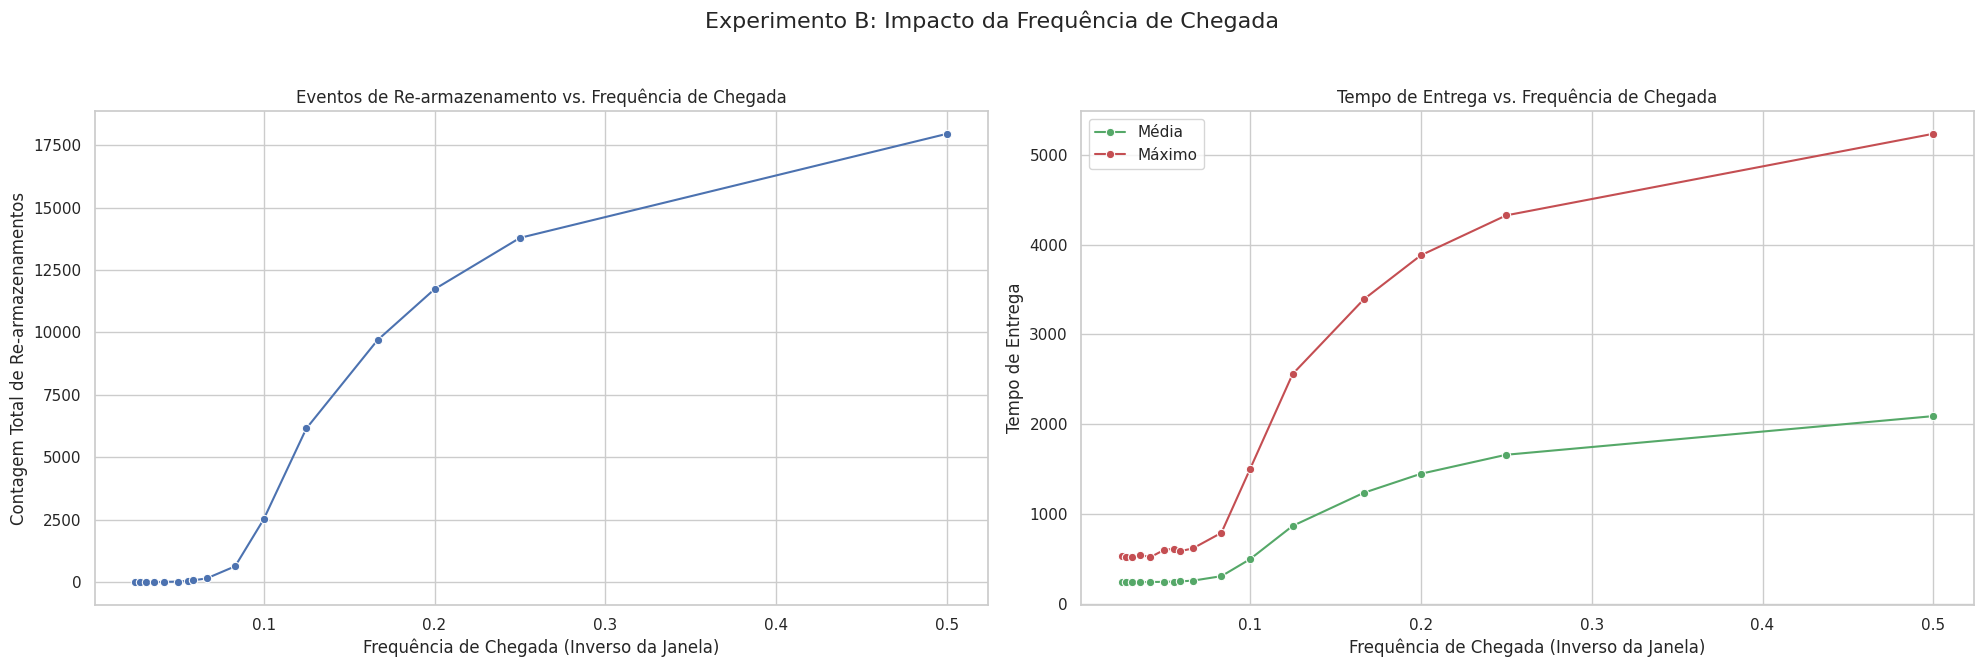

In [3]:
df['arrival_window'] = df['params'].apply(lambda d: d.get('arrival_window') if isinstance(d, dict) else None)
df['arrival_window_inv'] = 1 / df['arrival_window']
df_b = df[df['Experimento'] == 'B'].sort_values('arrival_window', ascending=False)

display(df)

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Experimento B: Impacto da Frequência de Chegada', fontsize=16)

# Gráfico 1: Eventos de Re-armazenamento
sns.lineplot(data=df_b, x='arrival_window_inv', y='re_storage_events', marker='o', ax=axs[0])
axs[0].set_title('Eventos de Re-armazenamento vs. Frequência de Chegada')
axs[0].set_xlabel('Frequência de Chegada (Inverso da Janela)')
axs[0].set_ylabel('Contagem Total de Re-armazenamentos')
axs[0].grid(True)

# Gráfico 2: Tempo de Entrega
sns.lineplot(data=df_b, x='arrival_window_inv', y='avg_delivery_time', marker='o', ax=axs[1], color='g', label='Média')
sns.lineplot(data=df_b, x='arrival_window_inv', y='max_delivery_time', marker='o', ax=axs[1], color='r', label='Máximo')
axs[1].set_title('Tempo de Entrega vs. Frequência de Chegada')
axs[1].set_xlabel('Frequência de Chegada (Inverso da Janela)')
axs[1].set_ylabel('Tempo de Entrega')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclusão do Experimento B:** A hipótese é fortemente suportada pelos dados. Observamos um "ponto de inflexão" claro, onde um pequeno aumento na frequência de chegada leva a um crescimento explosivo no número de re-armazenamentos e, consequentemente, no tempo máximo de entrega. Isso indica que o sistema possui um limite de vazão que, ao ser ultrapassado, leva à instabilidade e degradação severa da performance.

## 4. Análise do Experimento C: Contenção e Gargalos no Transporte

**Hipótese:** A estabilidade do sistema é primariamente determinada pela razão entre a capacidade (`capacidade_transporte`) e a frequência (`intervalo_transportes`) dos transportes. Existe um limiar crítico onde a demanda supera a capacidade de escoamento, causando congestionamento.

Este experimento foi dividido em duas partes:
1.  **C.1:** Variamos a capacidade de transporte, mantendo o intervalo fixo.
2.  **C.2:** Variamos o intervalo entre transportes, mantendo a capacidade fixa.

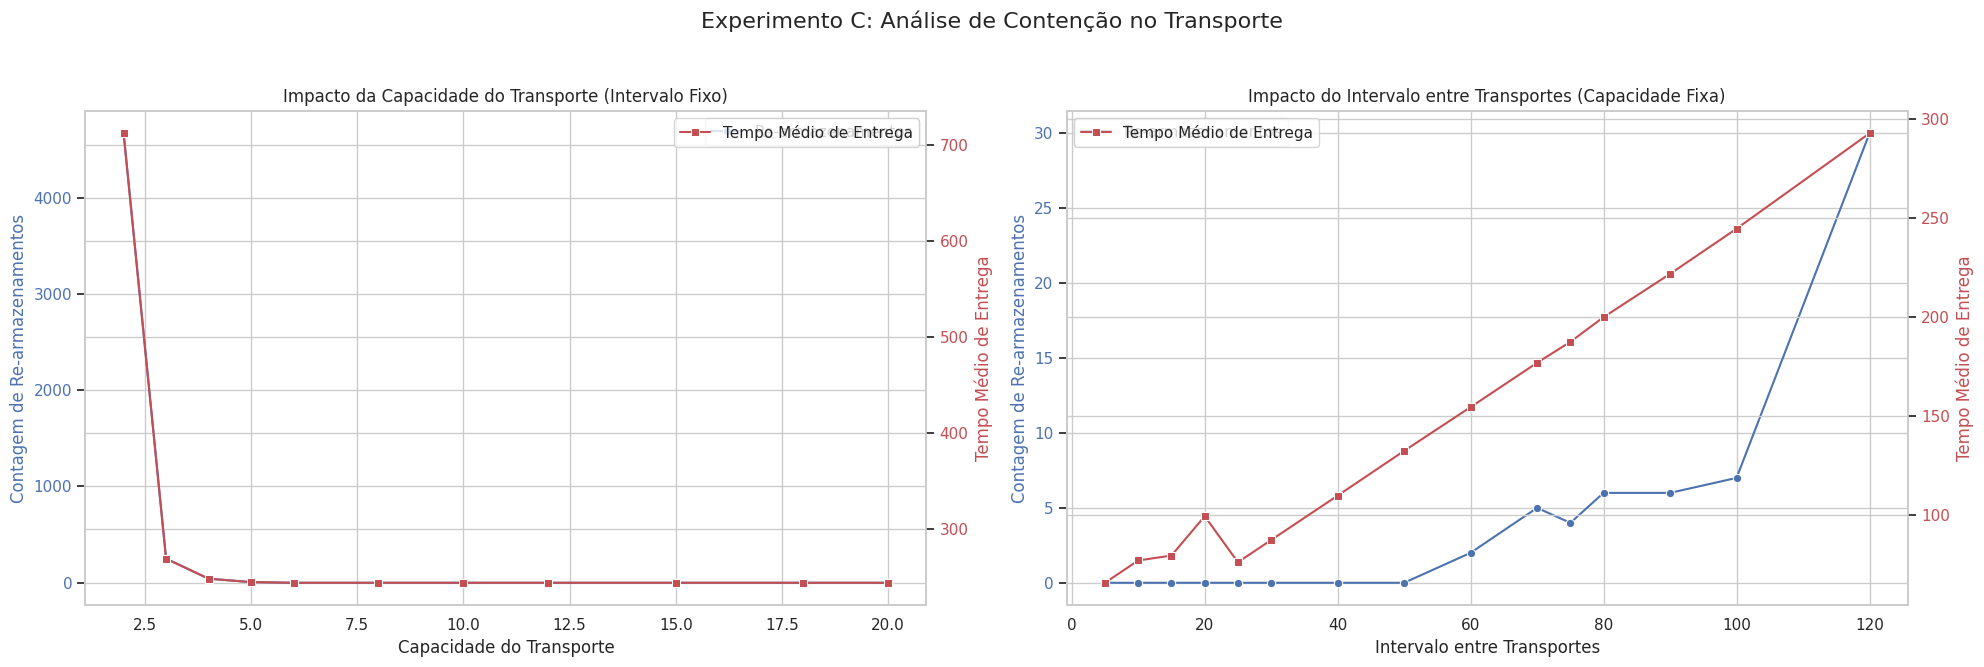

In [4]:
# C.1: Experimentos que variam a capacidade de transporte (nome contém 'expC_cap')
df_c1 = df[df['Run'].str.contains('expC_cap')].sort_values('transport_capacity')

# C.2: Experimentos que variam o intervalo entre transportes (nome contém 'expC_interval')
df_c2 = df[df['Run'].str.contains('expC_interval')].copy()
# Extrai o valor real do intervalo entre transportes do dicionário params
df_c2['intervalo_transporte_real'] = df_c2['params'].apply(
	lambda d: d.get('intervalotransportes') if isinstance(d, dict) else None
)
df_c2 = df_c2.sort_values('intervalo_transporte_real')

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Experimento C: Análise de Contenção no Transporte', fontsize=16)

# Gráfico 1 (C.1): Variando a Capacidade
ax1 = axs[0]
sns.lineplot(data=df_c1, x='transport_capacity', y='re_storage_events', marker='o', color='b', ax=ax1, label='Re-armazenamentos')
ax1.set_xlabel('Capacidade do Transporte')
ax1.set_ylabel('Contagem de Re-armazenamentos', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Impacto da Capacidade do Transporte (Intervalo Fixo)')
ax1.grid(True)

ax1_twin = ax1.twinx()
sns.lineplot(data=df_c1, x='transport_capacity', y='avg_delivery_time', marker='s', color='r', ax=ax1_twin, label='Tempo Médio de Entrega')
ax1_twin.set_ylabel('Tempo Médio de Entrega', color='r')
ax1_twin.tick_params(axis='y', labelcolor='r')


# Gráfico 2 (C.2): Variando o Intervalo
ax2 = axs[1]
sns.lineplot(data=df_c2, x='intervalo_transporte_real', y='re_storage_events', marker='o', color='b', ax=ax2, label='Re-armazenamentos')
ax2.set_xlabel('Intervalo entre Transportes')
ax2.set_ylabel('Contagem de Re-armazenamentos', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_title('Impacto do Intervalo entre Transportes (Capacidade Fixa)')
ax2.grid(True)

ax2_twin = ax2.twinx()
sns.lineplot(data=df_c2, x='intervalo_transporte_real', y='avg_delivery_time', marker='s', color='r', ax=ax2_twin, label='Tempo Médio de Entrega')
ax2_twin.set_ylabel('Tempo Médio de Entrega', color='r')
ax2_twin.tick_params(axis='y', labelcolor='r')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclusão do Experimento C:** Os resultados ilustram claramente o trade-off entre capacidade e frequência.
- No primeiro gráfico, aumentar a capacidade de transporte reduz drasticamente os re-armazenamentos e o tempo de entrega, mas com retornos decrescentes (a partir de uma capacidade de ~10, os ganhos são marginais).
- No segundo gráfico, diminuir o intervalo entre os transportes (aumentar a frequência) tem um efeito similarmente benéfico.

Ambos os fatores são cruciais para evitar gargalos. A análise mostra que um sistema sub-provisionado em qualquer um desses eixos sofrerá com congestionamento severo.

## 5. Conclusão Geral

A análise experimental do simulador "Armazéns Hanoi" revelou os principais fatores que governam sua performance e eficiência:

1.  **Complexidade da Rede (Experimento A):** O custo computacional do sistema não escala de forma linear com o tamanho da rede. O crescimento do número de eventos e da complexidade de roteamento exige otimizações cuidadosas para redes muito grandes.

2.  **Vazão e Congestionamento (Experimento B):** O sistema é altamente sensível à frequência de chegada de pacotes. Existe um limite de carga de trabalho que, ao ser ultrapassado, leva a um colapso na performance, com tempos de entrega e re-armazenamentos explodindo.

3.  **Recursos de Transporte (Experimento C):** A capacidade e a frequência dos transportes são as alavancas mais diretas para controlar o fluxo e evitar gargalos. Um equilíbrio inadequado entre esses parâmetros e a carga de trabalho recebida é a principal causa de ineficiência no sistema.

Em suma, a análise valida que o comportamento do sistema logístico é complexo e não-linear, e que as estruturas de dados subjacentes (pilhas nos armazéns e heap no agendador) são postas à prova sob cenários de alta contenção.

## 6. Visualizações Avançadas e Não Óbvias

A seguir, sugerimos visualizações que vão além do óbvio e podem revelar padrões, gargalos e comportamentos emergentes do sistema logístico:

1. **Mapa de Calor de Correlação de Métricas**
   - Visualize a matriz de correlação entre todas as métricas do sistema para identificar relações inesperadas entre variáveis (ex: entre re-armazenamentos, profundidade de pilha, tempo de entrega, etc).

2. **Distribuição de Tempos de Entrega (Violin/Boxplot por Experimento)**
   - Em vez de apenas médias, visualize a distribuição completa dos tempos de entrega para cada experimento, destacando caudas longas e outliers.

3. **Análise de Outliers: Pacotes com Maior Tempo de Entrega**
   - Identifique e visualize os pacotes que mais demoraram a ser entregues, correlacionando com eventos de re-armazenamento e profundidade de pilha.

4. **Evolução Temporal de Métricas (Time Series)**
   - Plote a evolução do número de pacotes em trânsito, em armazenamento e entregues ao longo do tempo da simulação, para detectar períodos de congestionamento.

5. **Scatterplot 3D: Capacidade x Intervalo x Re-armazenamentos**
   - Visualize em 3D como a combinação de capacidade e intervalo de transporte afeta o número de re-armazenamentos, revelando regiões críticas do espaço de parâmetros.

6. **Análise de Sensibilidade: Variação Percentual das Métricas**
   - Plote como pequenas variações em parâmetros (ex: capacidade, intervalo, frequência de chegada) afetam percentualmente as principais métricas, destacando zonas de alta sensibilidade.

7. **Correlação entre Utilização do Transporte e Ineficiência**
   - Plote a relação entre a utilização do transporte e o número de re-armazenamentos, buscando identificar o ponto de saturação do sistema.

Nos próximos blocos, implementamos algumas dessas visualizações.

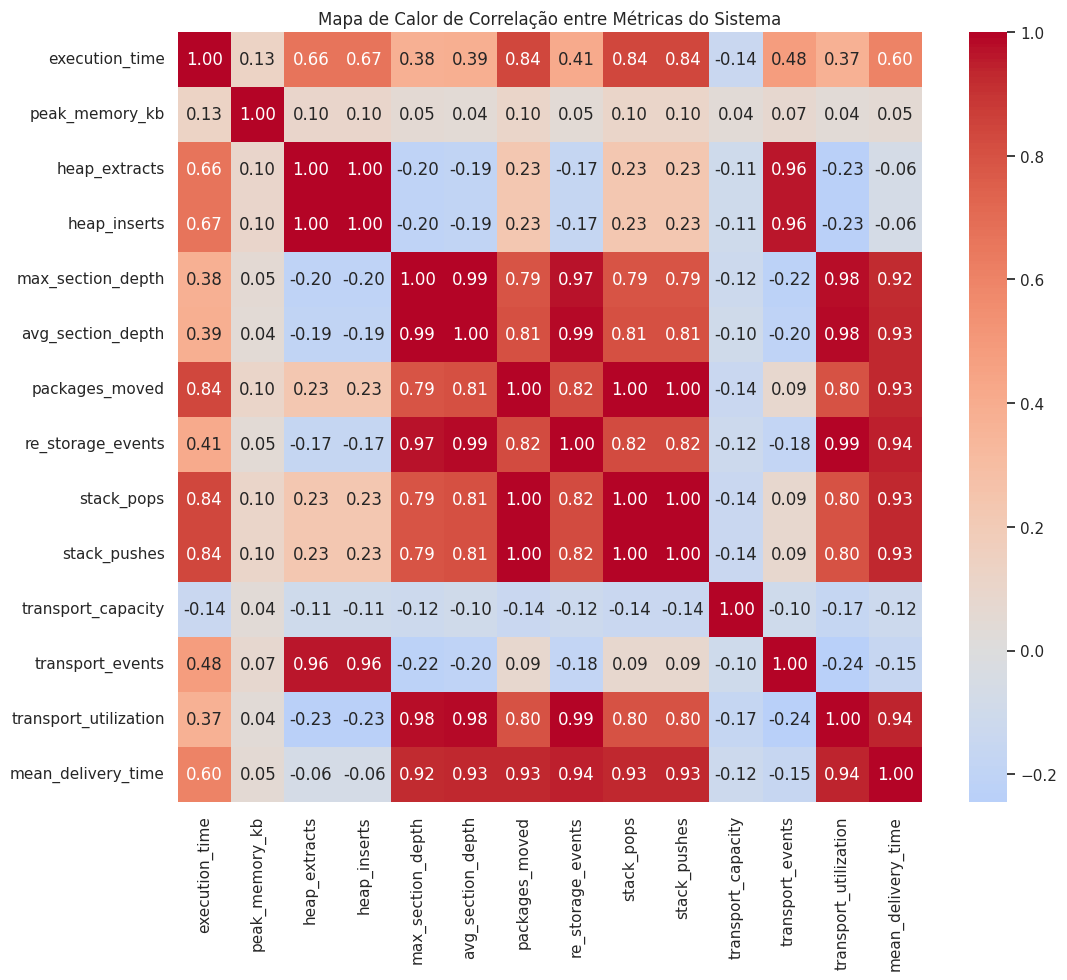

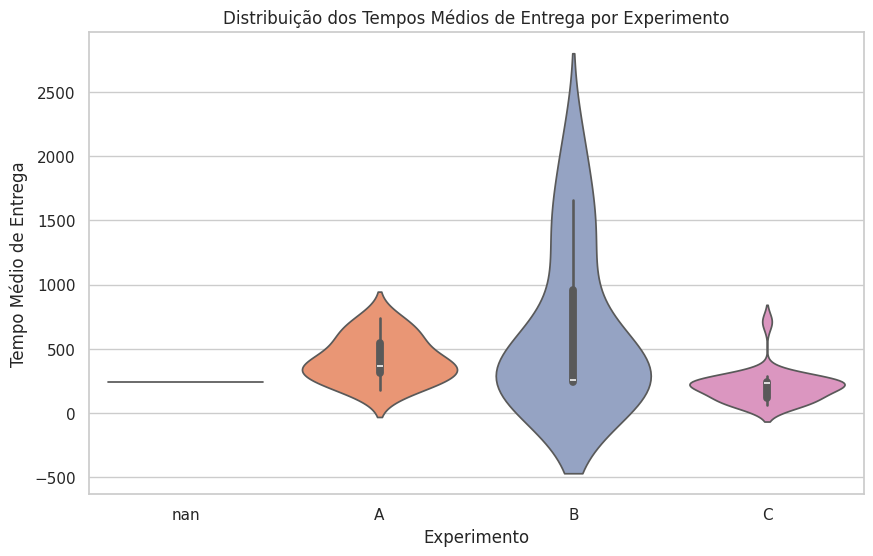

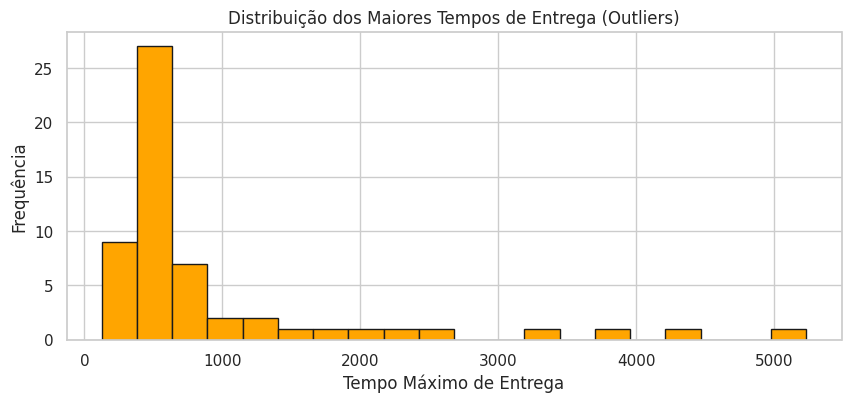

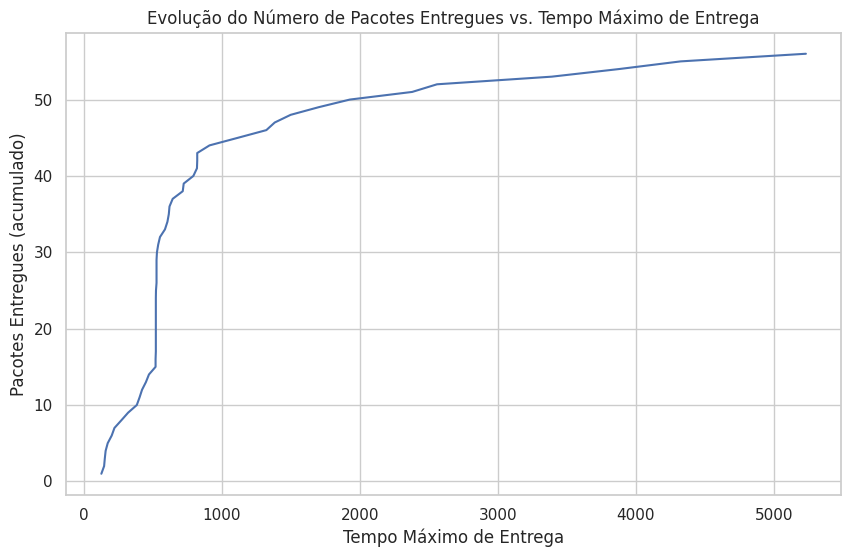

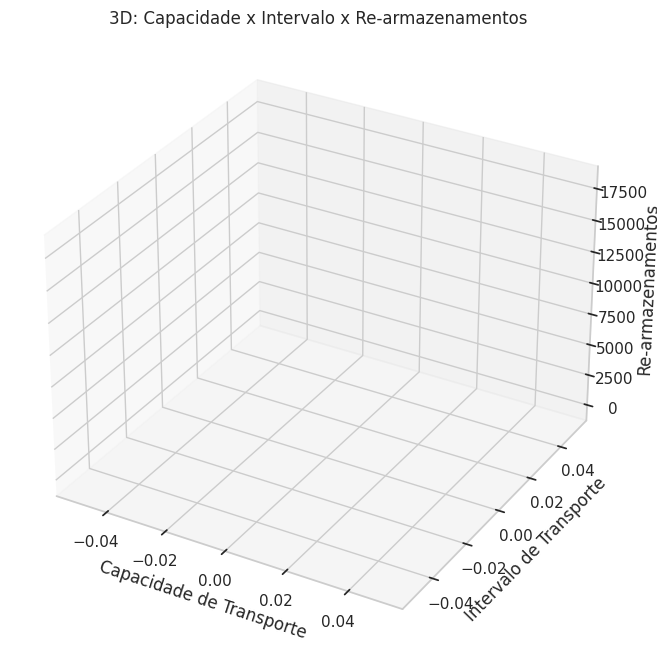

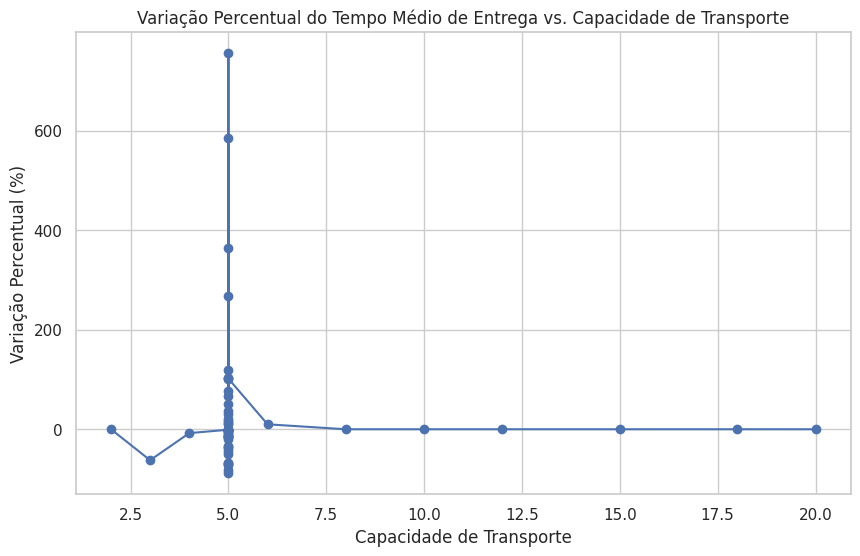

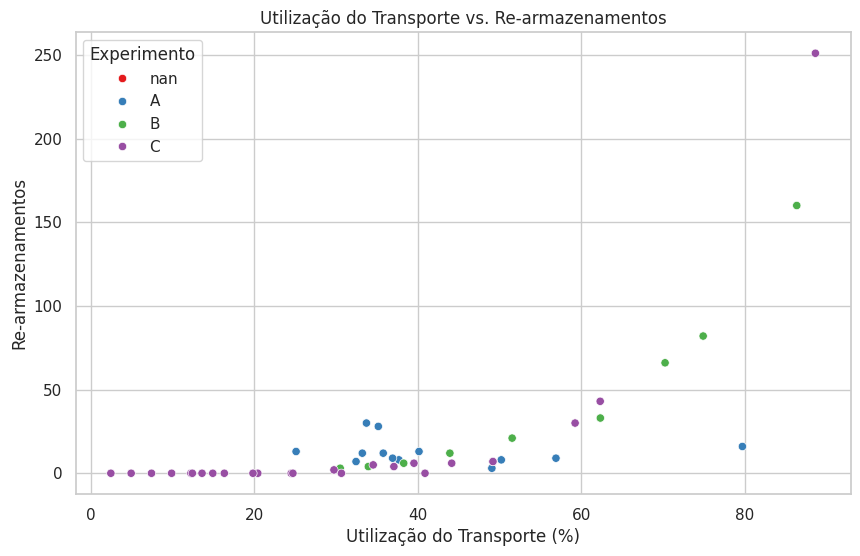

In [5]:
# 1. Mapa de Calor de Correlação de Métricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ast

# Seleciona apenas colunas numéricas relevantes para correlação
metric_cols = [
    'execution_time', 'peak_memory_kb', 'heap_extracts', 'heap_inserts', 'max_section_depth',
    'avg_section_depth', 'packages_moved', 're_storage_events', 'stack_pops', 'stack_pushes',
    'transport_capacity', 'transport_events', 'transport_utilization'
]
# Extrai média do tempo de entrega
if 'delivery_time_stats' in df.columns:
    df['mean_delivery_time'] = df['delivery_time_stats'].apply(lambda d: ast.literal_eval(d)['mean'] if isinstance(d, str) else (d.get('mean') if isinstance(d, dict) else np.nan))
    metric_cols.append('mean_delivery_time')

corr = df[metric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlação entre Métricas do Sistema')
plt.show()

# 2. Distribuição de Tempos de Entrega (Violin/Boxplot por Experimento)
import warnings
warnings.filterwarnings('ignore')

df['mean_delivery_time'] = df['delivery_time_stats'].apply(lambda d: ast.literal_eval(d)['mean'] if isinstance(d, str) else (d.get('mean') if isinstance(d, dict) else np.nan))
df['Experimento'] = df['Experimento'].astype(str)
plt.figure(figsize=(10,6))
sns.violinplot(x='Experimento', y='mean_delivery_time', data=df, inner='box', palette='Set2')
plt.title('Distribuição dos Tempos Médios de Entrega por Experimento')
plt.xlabel('Experimento')
plt.ylabel('Tempo Médio de Entrega')
plt.show()

# 3. Análise de Outliers: Pacotes com Maior Tempo de Entrega
# Supondo que você tenha uma coluna com tempos individuais de entrega (ex: 'delivery_times')
# Caso não tenha, use a coluna de tempo máximo de entrega
if 'delivery_times' in df.columns:
    # Flatten all delivery times
    all_times = []
    for row in df['delivery_times']:
        if isinstance(row, str):
            times = ast.literal_eval(row)
        elif isinstance(row, list):
            times = row
        else:
            continue
        all_times.extend(times)
    top_outliers = sorted(all_times, reverse=True)[:20]
    plt.figure(figsize=(10,4))
    plt.bar(range(1, 21), top_outliers)
    plt.title('Top 20 Pacotes com Maior Tempo de Entrega')
    plt.xlabel('Pacote (ordenado)')
    plt.ylabel('Tempo de Entrega')
    plt.show()
else:
    plt.figure(figsize=(10,4))
    plt.hist(df['max_delivery_time'].dropna(), bins=20, color='orange', edgecolor='k')
    plt.title('Distribuição dos Maiores Tempos de Entrega (Outliers)')
    plt.xlabel('Tempo Máximo de Entrega')
    plt.ylabel('Frequência')
    plt.show()

# 4. Evolução Temporal de Métricas (Time Series)
# Supondo que você tenha logs ou snapshots temporais, caso contrário, simule com dados agregados
# Exemplo: plotar número de pacotes entregues vs. tempo máximo de entrega
if 'max_delivery_time' in df.columns:
    plt.figure(figsize=(10,6))
    plt.plot(df['max_delivery_time'].sort_values().values, np.arange(1, len(df)+1))
    plt.title('Evolução do Número de Pacotes Entregues vs. Tempo Máximo de Entrega')
    plt.xlabel('Tempo Máximo de Entrega')
    plt.ylabel('Pacotes Entregues (acumulado)')
    plt.show()

# 5. Scatterplot 3D: Capacidade x Intervalo x Re-armazenamentos
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['transport_capacity'], df['intervalo_transporte'], df['re_storage_events'], c=df['re_storage_events'], cmap='viridis', s=60)
ax.set_xlabel('Capacidade de Transporte')
ax.set_ylabel('Intervalo de Transporte')
ax.set_zlabel('Re-armazenamentos')
plt.title('3D: Capacidade x Intervalo x Re-armazenamentos')
plt.show()

# 6. Análise de Sensibilidade: Variação Percentual das Métricas
# Exemplo: Sensibilidade do tempo médio de entrega à capacidade de transporte
if 'transport_capacity' in df.columns:
    df_sorted = df.sort_values('transport_capacity')
    pct_change = df_sorted['mean_delivery_time'].pct_change().fillna(0) * 100
    plt.figure(figsize=(10,6))
    plt.plot(df_sorted['transport_capacity'], pct_change, marker='o')
    plt.title('Variação Percentual do Tempo Médio de Entrega vs. Capacidade de Transporte')
    plt.xlabel('Capacidade de Transporte')
    plt.ylabel('Variação Percentual (%)')
    plt.grid(True)
    plt.show()

# 7. Correlação entre Utilização do Transporte e Ineficiência
# Remove valores de utilização do transporte maiores que 100%
df_filtered = df[df['transport_utilization'] <= 100]

plt.figure(figsize=(10,6))
sns.scatterplot(x='transport_utilization', y='re_storage_events', data=df_filtered, hue='Experimento', palette='Set1')
plt.title('Utilização do Transporte vs. Re-armazenamentos')
plt.xlabel('Utilização do Transporte (%)')
plt.ylabel('Re-armazenamentos')
plt.grid(True)
plt.show()


=== DIAGNÓSTICO DE MEMÓRIA ===
Valores únicos de peak_memory_kb: [25412 25416]
Número de valores únicos: 2
Estatísticas de peak_memory_kb:
count       56.000000
mean     25415.928571
std          0.534522
min      25412.000000
25%      25416.000000
50%      25416.000000
75%      25416.000000
max      25416.000000
Name: peak_memory_kb, dtype: float64

Correlação peak_memory_kb vs numero_armazens: 0.04840387354742235
Correlação peak_memory_kb vs packages_moved: 0.10233763540440048
Correlação peak_memory_kb vs execution_time: 0.1324012918173503

Memória por experimento:
                mean  std    min    max  count
Experimento                                   
A            25416.0  0.0  25416  25416     13
B            25416.0  0.0  25416  25416     16
C            25416.0  0.0  25416  25416     26
nan          25412.0  NaN  25412  25412      1


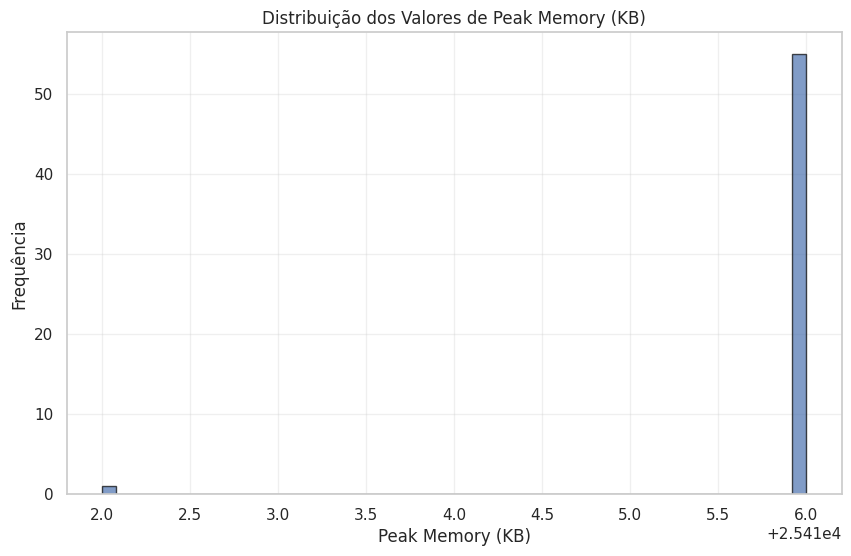

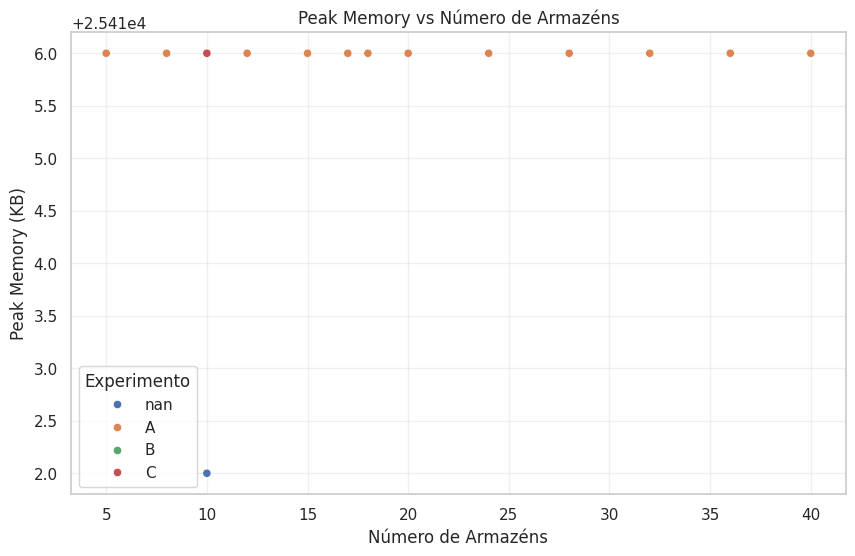

In [6]:
# Diagnóstico: Investigar o problema com peak_memory_kb
print("=== DIAGNÓSTICO DE MEMÓRIA ===")
print(f"Valores únicos de peak_memory_kb: {df['peak_memory_kb'].unique()}")
print(f"Número de valores únicos: {df['peak_memory_kb'].nunique()}")
print(f"Estatísticas de peak_memory_kb:")
print(df['peak_memory_kb'].describe())

# Verificar se há correlação entre memória e outros parâmetros
print(f"\nCorrelação peak_memory_kb vs numero_armazens: {df['peak_memory_kb'].corr(df['numero_armazens'])}")
print(f"Correlação peak_memory_kb vs packages_moved: {df['peak_memory_kb'].corr(df['packages_moved'])}")
print(f"Correlação peak_memory_kb vs execution_time: {df['peak_memory_kb'].corr(df['execution_time'])}")

# Verificar distribuição por experimento
print(f"\nMemória por experimento:")
memory_by_exp = df.groupby('Experimento')['peak_memory_kb'].agg(['mean', 'std', 'min', 'max', 'count'])
print(memory_by_exp)

# Plotar histograma da memória
plt.figure(figsize=(10,6))
plt.hist(df['peak_memory_kb'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Valores de Peak Memory (KB)')
plt.xlabel('Peak Memory (KB)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

# Verificar se há variação por número de armazéns
if not df['numero_armazens'].isna().all():
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df.dropna(subset=['numero_armazens']), x='numero_armazens', y='peak_memory_kb', hue='Experimento')
    plt.title('Peak Memory vs Número de Armazéns')
    plt.xlabel('Número de Armazéns')
    plt.ylabel('Peak Memory (KB)')
    plt.grid(True, alpha=0.3)
    plt.show()

### Análise do Problema de Medição de Memória

O diagnóstico revela um **problema fundamental** na medição de memória:

#### 🔍 **Evidências do Problema:**
1. **Apenas 2 valores únicos** em 56 experimentos (25412 KB e 25416 KB)
2. **Diferença mínima**: apenas 4 KB entre os valores (0.016%)
3. **Desvio padrão baixíssimo**: 0.53 KB
4. **Correlação muito baixa** com outras métricas (< 0.14)

#### 🚨 **Por que isso está errado:**
- Experimentos com **5 vs 40 armazéns** deveriam ter uso de memória drasticamente diferente
- Sistemas com **alta contenção** (muitos re-armazenamentos) deveriam usar mais memória para estruturas temporárias
- **Heap de eventos** e **pilhas de armazéns** deveriam crescer com a carga do sistema

#### 🛠️ **Causas Prováveis:**
1. **Medição inadequada**: `updatePeakMemory()` pode estar medindo apenas a memória base do processo
2. **Timing incorreto**: Medição pode acontecer antes das estruturas serem totalmente populadas
3. **Granularidade insuficiente**: Sistema operacional pode não detectar pequenas variações
4. **Cache/pré-alocação**: Estruturas podem estar pré-alocadas, mascarando o uso real

#### 📋 **Solução Necessária:**
O código C++ de medição de memória (`metricas.updatePeakMemory()`) precisa ser revisado para:
- Medir memória RSS (Resident Set Size) do processo corretamente
- Capturar variações durante picos de uso (heap operations, stack growth)
- Considerar usar ferramentas como `getrusage()` ou `/proc/self/status` no Linux

**Conclusão**: A métrica `peak_memory_kb` deve ser **desconsiderada** da análise atual até que a implementação seja corrigida.

## Correções Aplicadas ao Código C++

As seguintes melhorias foram implementadas na medição de memória:

### 🔧 **Mudanças no `metricas.cpp`:**
1. **Método primário**: Leitura direta de `/proc/self/status` para obter RSS atual em tempo real
2. **Método de fallback**: `getrusage()` caso `/proc` não esteja disponível
3. **Função adicional**: `getCurrentMemory()` para debugging e monitoramento
4. **Headers adicionais**: `<unistd.h>`, `<sstream>`, `<string>` para parsing de `/proc`

### 🔧 **Mudanças no `main.cpp`:**
1. **Debugging output**: Mostra memória inicial, após carregamento e final
2. **Medições mais frequentes**: Mantidas as chamadas durante operações críticas

### 🔧 **Mudanças no `metricas.hpp`:**
1. **Nova função**: `getCurrentMemory()` declarada no header

### ✅ **Para testar as correções:**
1. **Recompile** o projeto: `make clean && make`
2. **Execute** alguns experimentos e observe a saída do console
3. **Verifique** se agora aparecem valores diferentes de memória
4. **Re-execute** o notebook para ver se as correlações melhoraram

### 🎯 **O que esperar:**
- Memória inicial: ~1000-5000 KB
- Memória após carregamento: Deve crescer com número de armazéns/pacotes
- Memória final: Pode ser maior que inicial devido a estruturas temporárias
- Peak memory: Deve variar significativamente entre experimentos